In [1]:
import pandas as pd

In [2]:
people=pd.read_csv("baseballdatabank-master/core/People.csv")

In [3]:
people.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [4]:
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


### Non-null birth and death years

In [5]:
def get_col(df, colname):
    col = df[colname]
    return col[col.notnull()]

In [6]:
birth_year = get_col(people, 'birthYear')

In [7]:
death_year = get_col(people, 'deathYear')

In [8]:
from matplotlib import pyplot as plt  

https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html

(array([  7.,  16.,  29.,  65.,  94., 116., 138., 167., 212., 213., 259.,
        301., 341., 387., 309., 437., 455., 505., 568., 621., 518., 516.,
        440., 421., 465., 433., 452., 436., 458., 465.]),
 array([1872.        , 1876.93333333, 1881.86666667, 1886.8       ,
        1891.73333333, 1896.66666667, 1901.6       , 1906.53333333,
        1911.46666667, 1916.4       , 1921.33333333, 1926.26666667,
        1931.2       , 1936.13333333, 1941.06666667, 1946.        ,
        1950.93333333, 1955.86666667, 1960.8       , 1965.73333333,
        1970.66666667, 1975.6       , 1980.53333333, 1985.46666667,
        1990.4       , 1995.33333333, 2000.26666667, 2005.2       ,
        2010.13333333, 2015.06666667, 2020.        ]),
 <BarContainer object of 30 artists>)

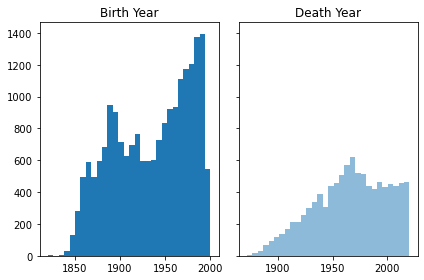

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, tight_layout=True)
axs[0].set_title('Birth Year')
axs[0].hist(birth_year, bins=30)
axs[1].set_title('Death Year')
axs[1].hist(death_year, bins=30, alpha=0.5)

<AxesSubplot:title={'center':'Birth Country'}>

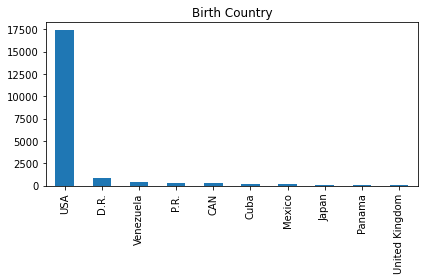

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharey=True, tight_layout=True)
axs.set_title('Birth Country')
get_col(people, 'birthCountry').value_counts()[:10].plot(kind='bar')

In [11]:
get_col(people, 'birthCountry').value_counts()[:10]

USA               17394
D.R.                791
Venezuela           425
P.R.                270
CAN                 255
Cuba                223
Mexico              136
Japan                70
Panama               65
United Kingdom       51
Name: birthCountry, dtype: int64

### Now let's try without USA (normalized to 1)

<AxesSubplot:title={'center':'Death Country'}>

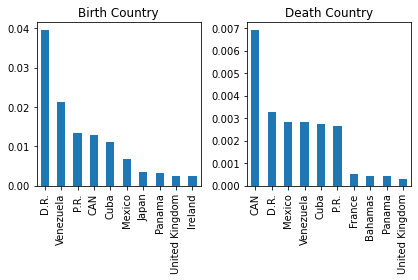

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True)
axs[0].set_title('Birth Country')
get_col(people, 'birthCountry').value_counts(normalize=True)[1:11].plot(kind='bar', ax=axs[0])
axs[1].set_title('Death Country')
get_col(people, 'deathCountry').value_counts(normalize=True)[1:11].plot(kind='bar', ax=axs[1])

### In what states were most players born?

<AxesSubplot:title={'center':'Birth State'}>

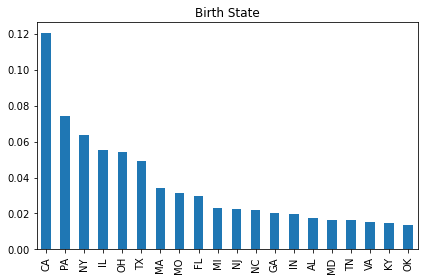

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharey=True, tight_layout=True)
axs.set_title('Birth State')
get_col(people, 'birthState').value_counts(normalize=True)[:20].plot(kind='bar')


(*see if I can normalize by state population. actually that would be tough b/c population changes by year*)

### Bats, Throws

<AxesSubplot:title={'center':'Throws'}, ylabel='throws'>

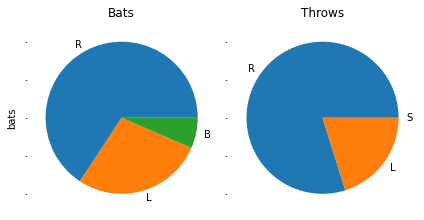

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, tight_layout=True)
axs[0].set_title('Bats')
get_col(people, 'bats').value_counts(normalize=True).plot(kind='pie', ax=axs[0])
axs[1].set_title('Throws')
get_col(people, 'throws').value_counts(normalize=True).plot(kind='pie', ax=axs[1])

### Weight

count    19273.000000
mean       187.796295
std         26.330706
min         65.000000
25%        172.000000
50%        185.000000
75%        200.000000
max       2125.000000
Name: weight, dtype: float64

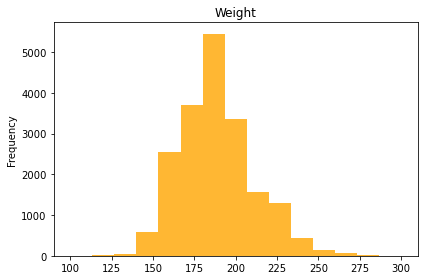

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharey=True, tight_layout=True)
axs.set_title('Weight')
weight = get_col(people, 'weight')
#weight = weight[(weight>100) & (weight<300)]
weight.plot(kind="hist", bins=15, alpha=.8, color='orange', range=(100,300))
weight.describe()

count    19351.000000
mean        72.341998
std          2.602669
min         63.000000
25%         71.000000
50%         72.000000
75%         74.000000
max         83.000000
Name: height, dtype: float64

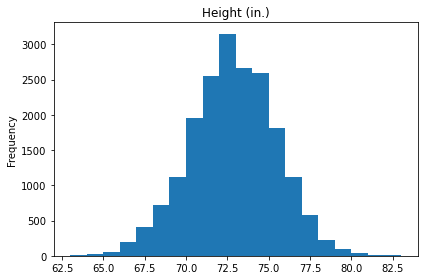

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharey=True, tight_layout=True)
axs.set_title('Height (in.)')
height = get_col(people, 'height')
height = height[height>60]
height.plot(kind="hist", bins=20)
height.describe()

### height by birth year

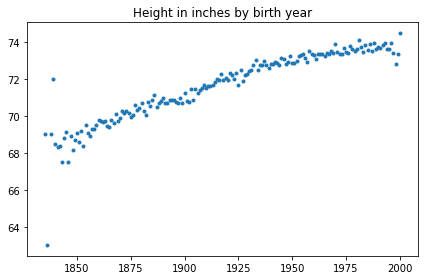

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharey=True, tight_layout=True)
by_yr = people.groupby("birthYear").mean()['height']
axs.set_title('Height in inches by birth year')
axs.scatter(by_yr.index, by_yr, marker='.')

### weight in lbs by birth year

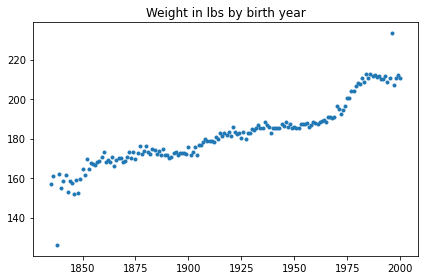

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharey=True, tight_layout=True)
by_yr = people.groupby("birthYear").mean()['weight']
axs.set_title('Weight in lbs by birth year')
axs.scatter(by_yr.index, by_yr, marker='.')

In [19]:
def bmi(weight, height):
    return(weight/height**2)

### bmi by year

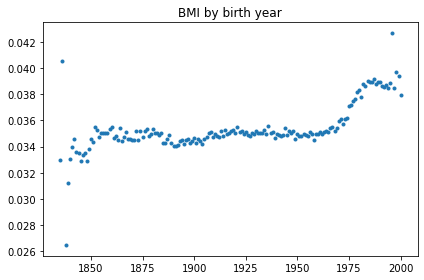

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharey=True, tight_layout=True)
by_yr = people.groupby("birthYear").mean()[['weight', 'height']]
#by_yr = people[people['birthYear']>1950].groupby("birthYear").mean()[['weight', 'height']]
axs.set_title('BMI by birth year')
bmi = pd.Series(by_yr['weight']/by_yr['height']**2)
axs.scatter(bmi.index, bmi, marker='.')